<a href="https://colab.research.google.com/github/KuanChihLee/Supervised-Learning/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## This Assignment implement Linear Regression applied different regularization methods and a case study using data processing knowledge and regularized models.

# Question 4

#### In this question we will evaluate the ability of regularization to perform variable selection.

Sampling data from Y = 2 + 3X + e

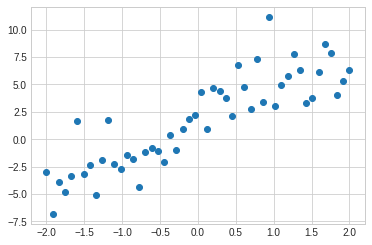

In [0]:
SampleNum = 50
Slope = 3
Intercept = 2
Mean = 0
Std = 2
#rng = np.random.RandomState(42)
#x = 10 * rng.rand(S_Num)
es = np.random.normal(Mean, Std, SampleNum)
x = np.linspace(-2, 2, SampleNum)
y = Slope * x + Intercept + es
plt.scatter(x, y)

#### Functions

In [0]:
import pandas as pd
from random import shuffle
from math import sqrt, ceil, floor
from numpy.linalg import inv

def LS_AnalyticalSolu(x, y):
    '''
    Analytical solution of least square regression
    '''
    theta = np.round(np.dot(inv(x.T.dot(x)).dot(x.T), y), 10)
    
    return theta


def Rid_AnalyticalSolu_L2(x, y, lamda):
    '''
    Analytical solution of L2 least square regression
    '''
    N, P = x.shape
    Identity = np.identity(P)
    ## Very important!! We don't add penalty to Intercept
    Identity[0,0] = 0
    theta = np.round(np.dot(inv(x.T.dot(x) + lamda*Identity).dot(x.T), y), 10)
    
    return theta


def Lasso_AnalyticalSolu_L1(x, y, theta, lamda):
    '''
    Analytical solution of L1 least square regression
    ## In fact, we can't find Analytical Solution for Lasso Regression. 
    ## This one is GD solution
    '''
    N, P = x.shape
    diag_theta = np.zeros(P)
    for ele in range(len(theta)):
        if theta[ele] != 0:
            diag_theta[ele] = 1 / abs(theta[ele])
        else:
            diag_theta[ele] = 0
    ## Very important!! We don't add penalty to Intercept
    diag_theta[0] = 0
    ## Very important!! Notice the position of N
    theta = np.round(np.dot(inv(x.T.dot(x)/N + lamda*np.diag(diag_theta)).dot(x.T), y)/N, 10)
    
    return theta


def LS_MSE_Loss(x, y, theta):
    '''
    MSE loss function of least square regression (gradient solution)
    '''
    N, P = x.shape
    grad = np.zeros(P)
    
    err = x.dot(theta) - y 
    L = (sum(err ** 2.0))
    grad = np.round((2.0*x.T.dot(err)), 10)
   
    return L, grad
    

def Rid_MSE_Loss(x, y, theta, lamda):
    '''
    MSE loss function of L2 least square regression (gradient solution)
    '''
    N, P = x.shape
    grad = np.zeros(P)
    
    err = x.dot(theta) - y 
    L2_norm = lamda * np.dot(theta.T, theta)
    L = (sum(err ** 2.0) + L2_norm)
    grad = np.round(2*(x.T.dot(err) + lamda*theta), 10)
   
    return L, grad
    
    
def Lasso_MSE_Loss(x, y, theta, lamda):
    '''
    MSE loss function of L1 least square regression (gradient solution)
    '''
    N, P = x.shape
    grad = np.zeros(P)
    
    err = x.dot(theta) - y 
    L1_norm = sum(abs(theta * lamda))
    L = sum(err ** 2.0)/(2.0*N) + L1_norm
    grad = Lasso_AnalyticalSolu_L1(x, y, theta, lamda)

    return L, grad


def Optimizer_func(x, y, lr, theta, max_iter, reg = "LS", lamda = 0):
    '''
    Optimizer function for Gradient descent (not Ananlytical solu)
      Arguments: 
        features matrix, 
        labels, 
        learning rate, 
        theta_init, 
        max_iteration, 
        regularization name, 
        lambda
      Output:
        theta (vector)
    '''
    N, P = x.shape
    order = np.array(range(N))
    x_shuffle = np.zeros((1,P))
    
    for i in range(max_iter):
        x_input = x.values
        if reg == "lasso":
            J, grad = Lasso_MSE_Loss(x_input, y, theta, lamda)
            theta = grad
        elif reg == "ridge":
            J, grad = Rid_MSE_Loss(x_input, y, theta, lamda)
            theta -= lr*grad
        else:
            J, grad = LS_MSE_Loss(x_input, y, theta)
            theta -= lr*grad
        
    return theta


def Create_predictors(x, NumberOfPredictor):
    '''
    Create higher dimensional features
    output:
      columns names: intercpt, x^1, x^2, ... x^NumberOfPredictor
    '''
    X = pd.DataFrame({'Inter': np.ones(len(x))})
    for degree in range(NumberOfPredictor):
        name = "Degree_" + str(degree+1)
        X[name] = pow(x, degree+1)
        
    return X

Creating dataframe for X

In [0]:
NumberOfPredictor = 5
X = Create_predictors(x, NumberOfPredictor)
X.head()

,Inter,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5
0,1.0,-2.000000,4.000000,-8.000000,16.000000,-32.000000
1,1.0,-1.918367,3.680133,-7.059848,13.543381,-25.981180
2,1.0,-1.836735,3.373594,-6.196398,11.381139,-20.904132
3,1.0,-1.755102,3.080383,-5.406387,9.488760,-16.653743
4,1.0,-1.673469,2.800500,-4.686551,7.842799,-13.124684


#### OLS Analytical Solution- Question 4(a)(b)(i)

In [0]:
theta_ols  = LS_AnalyticalSolu(X, y)
print("parameters:\n" + "Intercept: " + str(theta_ols[0]))
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(theta_ols[degree+1]))
yhat_ols = X.dot(theta_ols)
print("Predicted MSE: ", sum((y - yhat_ols) ** 2)/(2*SampleNum))

parameters:
Intercept: 1.879164091
Degree_1: 5.8774825876
Degree_2: 0.1961651719
Degree_3: -2.2428156232
Degree_4: -0.1300456715
Degree_5: 0.3736727348
Predicted MSE:  1.7347462023088147


Compared with sklearn package

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(X,y)
print("Intercept: ", model.intercept_)
theta_ols2 = np.zeros(NumberOfPredictor+1)
theta_ols2[0] = model.intercept_
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(model.coef_[degree+1]))
    theta_ols2[degree+1] = model.coef_[degree+1]
yhat_ols2 = X.dot(theta_ols2)
print("Predicted MSE: ", sum((y - yhat_ols2) ** 2)/(2*SampleNum))

Intercept:  1.879164091021241
Degree_1: 5.877482587556225
Degree_2: 0.19616517190805519
Degree_3: -2.242815623154832
Degree_4: -0.13004567145691404
Degree_5: 0.37367273484255453
Predicted MSE:  1.7347462023088147


#### Ridge Analytical Solution- - Question 4(a)(b)(ii)

In [0]:
lamda = 5
theta_rid  = Rid_AnalyticalSolu_L2(X, y, lamda)
print("parameters:\n" + "Intercept: " + str(theta_rid[0]))
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(theta_rid[degree+1]))   
yhat_rid = X.dot(theta_rid)
print("Predicted MSE: ", sum((y - yhat_rid) ** 2)/(2*SampleNum))

parameters:
Intercept: 1.9264985465
Degree_1: 2.6896710501
Degree_2: 0.0970047902
Degree_3: 0.4317741997
Degree_4: -0.1039898187
Degree_5: -0.1229873553
Predicted MSE:  2.1032757617814553


Compared with sklearn package

In [0]:
from sklearn.linear_model import Ridge
model = Ridge(fit_intercept = True, alpha = 5)
model.fit(X,y)
print("Intercept: ", model.intercept_)
theta_rid2 = np.zeros(NumberOfPredictor+1)
theta_rid2[0] = model.intercept_
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(model.coef_[degree+1]))
    theta_rid2[degree+1] = model.coef_[degree+1]
yhat_rid2 = X.dot(theta_rid2)
print("Predicted MSE: ", sum((y - yhat_rid2) ** 2)/(2*SampleNum))

Intercept:  1.9264985465230084
Degree_1: 2.6896710500565315
Degree_2: 0.09700479024488665
Degree_3: 0.4317741996756877
Degree_4: -0.10398981874424791
Degree_5: -0.12298735530270727
Predicted MSE:  2.1032757617932685


#### Lasso GD Solution- - Question 4(a)(b)(iii)

In [0]:
lamda = 5
max_iter = 1000
LearningRate = 0.01
Regularization = "lasso"
theta_init = np.zeros(NumberOfPredictor+1, dtype=np.float64)
theta_lasso = Optimizer_func(X, y, LearningRate, theta_init, max_iter, Regularization, lamda)
print("parameters:\n" + "Intercept: " + str(theta_lasso[0]))
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(theta_lasso[degree+1]))
yhat_lasso = X.dot(theta_lasso)
print("Predicted MSE: ", sum((y - yhat_lasso) ** 2)/(2*SampleNum))

parameters:
Intercept: 2.071750111
Degree_1: 1.6e-09
Degree_2: -0.2672855056
Degree_3: 1e-10
Degree_4: -0.0
Degree_5: 0.204486883
Predicted MSE:  5.160389582960342


Compared with sklearn package

In [0]:
from sklearn.linear_model import Lasso
model = Lasso(fit_intercept = True, alpha = 5.0)
model.fit(X,y)
print("Intercept: ", model.intercept_)
theta_lasso2 = np.zeros(NumberOfPredictor+1)
theta_lasso2[0] = model.intercept_
for degree in range(NumberOfPredictor):
    print("Degree_" + str(degree+1) + ": " + str(model.coef_[degree+1]))
    theta_lasso2[degree+1] = model.coef_[degree+1]
yhat_lasso2 = X.dot(theta_lasso2)
print("Predicted MSE: ", sum((y - yhat_lasso2) ** 2)/(2*SampleNum))

Intercept:  1.7008232868015216
Degree_1: 0.0
Degree_2: -0.0
Degree_3: 0.0
Degree_4: -0.0
Degree_5: 0.20448688317107344
Predicted MSE:  5.215358201303278


#### OLS Analytical Solution repeated 1000 times- Question 4(c)(i)

In [0]:
y_ols_repeat = list()
x1_ols_repeat = list()
X_1point5 = [1, 1.5, pow(1.5,2), pow(1.5,3), pow(1.5,4), pow(1.5,5)]
for Iter in range(1000):
    es_predictor = np.random.normal(Mean, Std, SampleNum)
    x_predictor = np.linspace(-2, 2, SampleNum)
    y_predictor = Slope * x_predictor + Intercept + es_predictor
    
    NumberOfPredictor = 5
    X_predictor = Create_predictors(x_predictor, NumberOfPredictor)
    
    theta_ols_repeat  = LS_AnalyticalSolu(X_predictor, y_predictor)
    x1_ols_repeat.append(theta_ols_repeat[1])
    yhat_x = sum(X_1point5*theta_ols_repeat)
    y_ols_repeat.append(yhat_x)

Coefficient of X Term and True Value
True Value: 3
Mean:  3.0040839150895
Std:  1.0471448972825643
Min:  -8.39049e-05
Max:  7.6986592563

Predicted Y and True Value
True Value: 6.5
Mean:  6.509012340930894
Std:  0.7148810762345056
Min:  4.140649252521875
Max:  9.187865116506252


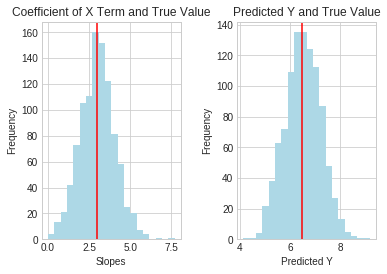

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1, 2, 1)
plt.hist(x1_ols_repeat, bins=20, color="lightblue")
plt.axvline(3, color="red")
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.title("Coefficient of X Term and True Value")

plt.subplot(1, 2, 2)
plt.hist(y_ols_repeat, bins=20, color="lightblue")
plt.axvline(2+3*1.5, color="red")
plt.xlabel("Predicted Y")
plt.ylabel("Frequency")
plt.title("Predicted Y and True Value")

print("Coefficient of X Term and True Value")
print("True Value:", 3)
print("Mean: ", np.mean(x1_ols_repeat))
print("Std: ", np.std(x1_ols_repeat))
print("Min: ", np.min(x1_ols_repeat))
print("Max: ", np.max(x1_ols_repeat))

print("\nPredicted Y and True Value")
print("True Value:", 2+3*1.5)
print("Mean: ", np.mean(y_ols_repeat))
print("Std: ", np.std(y_ols_repeat))
print("Min: ", np.min(y_ols_repeat))
print("Max: ", np.max(y_ols_repeat))

#### Ridge Regresion Analytical Solution repeated 1000 times- Question 4(c)(ii)

In [0]:
lamda = 5
y_rid_repeat = list()
x1_rid_repeat = list()
X_1point5 = [1, 1.5, pow(1.5,2), pow(1.5,3), pow(1.5,4), pow(1.5,5)]
for Iter in range(1000):
    es_predictor = np.random.normal(Mean, Std, SampleNum)
    x_predictor = np.linspace(-2, 2, SampleNum)
    y_predictor = Slope * x_predictor + Intercept + es_predictor
    
    NumberOfPredictor = 5
    X_predictor = Create_predictors(x_predictor, NumberOfPredictor)
    
    theta_rid_repeat  = Rid_AnalyticalSolu_L2(X_predictor, y_predictor, lamda)
    x1_rid_repeat.append(theta_rid_repeat[1])
    yhat_x = sum(X_1point5*theta_rid_repeat)
    y_rid_repeat.append(yhat_x)

Coefficient of X Term and True Value
True Value: 3
Mean:  1.7235142651706001
Std:  0.34776269847789265
Min:  0.1486798851
Max:  2.8579411911

Predicted Y and True Value
True Value: 6.5
Mean:  6.518642376811444
Std:  0.5591332578619338
Min:  4.408215791965626
Max:  8.261559194128125


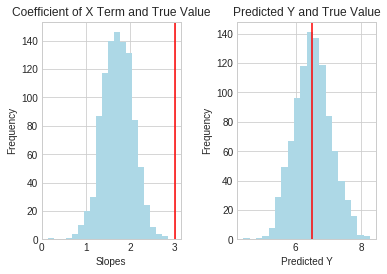

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1, 2, 1)
plt.hist(x1_rid_repeat, bins=20, color="lightblue")
plt.axvline(3, color="red")
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.title("Coefficient of X Term and True Value")

plt.subplot(1, 2, 2)
plt.hist(y_rid_repeat, bins=20, color="lightblue")
plt.axvline(2+3*1.5, color="red")
plt.xlabel("Predicted Y")
plt.ylabel("Frequency")
plt.title("Predicted Y and True Value")

print("Coefficient of X Term and True Value")
print("True Value:", 3)
print("Mean: ", np.mean(x1_rid_repeat))
print("Std: ", np.std(x1_rid_repeat))
print("Min: ", np.min(x1_rid_repeat))
print("Max: ", np.max(x1_rid_repeat))

print("\nPredicted Y and True Value")
print("True Value:", 2+3*1.5)
print("Mean: ", np.mean(y_rid_repeat))
print("Std: ", np.std(y_rid_repeat))
print("Min: ", np.min(y_rid_repeat))
print("Max: ", np.max(y_rid_repeat))

#### Lasso Regression GD solution repeated 1000 times- Question 4(c)(iii)

In [0]:
lamda = 5
max_iter = 1000
LearningRate = 0.01
Regularization = "lasso"
y_lasso_repeat = list()
x1_lasso_repeat = list()
X_1point5 = [1, 1.5, pow(1.5,2), pow(1.5,3), pow(1.5,4), pow(1.5,5)]
for Iter in range(1000):
    es_predictor = np.random.normal(Mean, Std, SampleNum)
    x_predictor = np.linspace(-2, 2, SampleNum)
    y_predictor = Slope * x_predictor + Intercept + es_predictor
    
    NumberOfPredictor = 5
    X_predictor = Create_predictors(x_predictor, NumberOfPredictor)
    
    theta_init = np.zeros(NumberOfPredictor+1, dtype=np.float64)
    theta_lasso_repeat = Optimizer_func(X_predictor, y_predictor, LearningRate, theta_init, max_iter, Regularization, lamda)
    x1_lasso_repeat.append(theta_lasso_repeat[1])
    yhat_x = sum(X_1point5*theta_lasso_repeat)
    y_lasso_repeat.append(yhat_x)

Coefficient of X Term and True Value
True Value: 3
Mean:  0.1755784543357
Std:  0.5504209067600884
Min:  0.0
Max:  3.3823995288

Predicted Y and True Value
True Value: 6.5
Mean:  3.8310924921445375
Std:  0.5825350874483418
Min:  2.1856693628781256
Max:  7.30343230548125


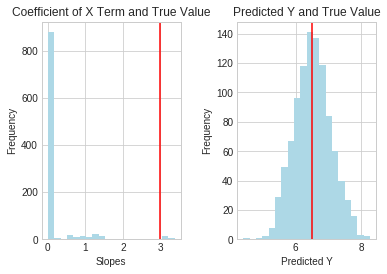

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1, 2, 1)
plt.hist(x1_lasso_repeat, bins=20, color="lightblue")
plt.axvline(3, color="red")
plt.xlabel("Slopes")
plt.ylabel("Frequency")
plt.title("Coefficient of X Term and True Value")

plt.subplot(1, 2, 2)
plt.hist(y_rid_repeat, bins=20, color="lightblue")
plt.axvline(2+3*1.5, color="red")
plt.xlabel("Predicted Y")
plt.ylabel("Frequency")
plt.title("Predicted Y and True Value")

print("Coefficient of X Term and True Value")
print("True Value:", 3)
print("Mean: ", np.mean(x1_lasso_repeat))
print("Std: ", np.std(x1_lasso_repeat))
print("Min: ", np.min(x1_lasso_repeat))
print("Max: ", np.max(x1_lasso_repeat))

print("\nPredicted Y and True Value")
print("True Value:", 2+3*1.5)
print("Mean: ", np.mean(y_lasso_repeat))
print("Std: ", np.std(y_lasso_repeat))
print("Min: ", np.min(y_lasso_repeat))
print("Max: ", np.max(y_lasso_repeat))

#### question 4(e)-1

#### Comment on the penalty caused by L1-Norm and L2-Norm
1. Based on the result of "Coefficient of X Term and True Value" plots, I find that L2-Norm force not only coefficient of X term but also coefficients of higher order term of X to be smaller values. (referring parameters: degree_1 to degree_5)
2. L1-Norm forces all coefficients to be exactly "0". If we add penalty to intercept term, the plot will be a line that lies on the x axis. 

#### Comment on Bias&Variance Tradeoff in Question 4(c)
1. According to aboved results, I conduct a result that since OLS is high model complexity, 4(c)(i) has a low bias (Mean of predicted Y is close to True value) and high variance compared with the result shown in Ridge and Lasso Regression. That means OLS with high complexity is intended to be overfitting as we expected.
2. Compared with Lasso Regression, there is no too much difference on variance term between Ridge and Lasso methods, but Ridge Regression has a good performance on bias term. That means Lasso is intended to be underfitting because high lambda causing a simple model.
3. As a result, I think Ridge Regression is more stable method than other two methods.

#### Ridge Regresion repeated 1000 times with different lambda- Question 4(d)(ii)

In [0]:
lamdas = [.1, .5, 1.0, 5.0, 10.0, 100.0]
X_1point5 = [1, 1.5, pow(1.5,2), pow(1.5,3), pow(1.5,4), pow(1.5,5)]
zeros = np.zeros(1000)
df = pd.DataFrame()
for col in range(len(lamdas)):
    df[('lamda'+str(col)+'_Xcoef')] = zeros
    df[('lamda'+str(col)+'_ypredic')] = zeros

for Iter in range(1000):
    es_predictor = np.random.normal(Mean, Std, SampleNum)
    x_predictor = np.linspace(-2, 2, SampleNum)
    y_predictor = Slope * x_predictor + Intercept + es_predictor
    
    NumberOfPredictor = 5
    X_predictor = Create_predictors(x_predictor, NumberOfPredictor)
    
    lamda_index = 0
    for lamda in lamdas:
        theta_rid_repeat  = Rid_AnalyticalSolu_L2(X_predictor, y_predictor, lamda)
        df[('lamda'+str(lamda_index)+'_Xcoef')][Iter] = theta_rid_repeat[1]
        yhat_x = sum(X_1point5*theta_rid_repeat)
        df[('lamda'+str(lamda_index)+'_ypredic')][Iter] = yhat_x
        lamda_index += 1

X Term (first order term) vs True Value (designed slope = 3.0)

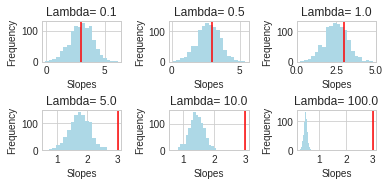

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=1.2, wspace=0.6)
for idx in range(len(lamdas)):
    plt.subplot(3, 3, idx+1)
    plt.hist(df[('lamda'+str(idx)+'_Xcoef')].values, bins=20, color="lightblue")
    plt.axvline(3, color="red")
    plt.xlabel("Slopes")
    plt.ylabel("Frequency")
    plt.title("Lambda= "+ str(lamdas[idx]))

Predicted Y vs True Value (label value)

Here, we want to predict X = 1.5, therefore, True value Y = 3.0 * 1.5 + 2 

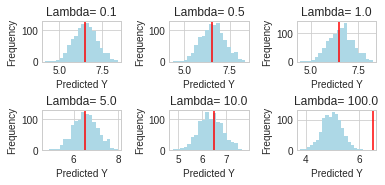

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=1.2, wspace=0.6)
for idx in range(len(lamdas)):
    plt.subplot(3, 3, idx+1)
    plt.hist(df[('lamda'+str(idx)+'_ypredic')].values, bins=20, color="lightblue")
    plt.axvline(2+3*1.5, color="red")
    plt.xlabel("Predicted Y")
    plt.ylabel("Frequency")
    plt.title("Lambda= "+ str(lamdas[idx]))

#### Lasso Regresion- Question 4(d)(iii)

In [0]:
lamdas = [.1, .5, 1.0, 5.0, 10.0, 100.0]
X_1point5 = [1, 1.5, pow(1.5,2), pow(1.5,3), pow(1.5,4), pow(1.5,5)]
zeros = np.zeros(1000)
df = pd.DataFrame()
for col in range(len(lamdas)):
    df[('lamda'+str(col)+'_Xcoef')] = zeros
    df[('lamda'+str(col)+'_ypredic')] = zeros

LearningRate = 0.01
Regularization = "lasso"
for Iter in range(1000):
    es_predictor = np.random.normal(Mean, Std, SampleNum)
    x_predictor = np.linspace(-2, 2, SampleNum)
    y_predictor = Slope * x_predictor + Intercept + es_predictor
    
    NumberOfPredictor = 5
    X_predictor = Create_predictors(x_predictor, NumberOfPredictor)
    
    if Iter%200== 0:
        print(Iter)
    lamda_index = 0
    for lamda in lamdas:
        theta_init = np.zeros(NumberOfPredictor+1, dtype=np.float64)
        theta_lasso_repeat = Optimizer_func(X_predictor, y_predictor, LearningRate, theta_init, max_iter, Regularization, lamda)
        df[('lamda'+str(lamda_index)+'_Xcoef')][Iter] = theta_lasso_repeat[1]
        yhat_x = sum(X_1point5*theta_lasso_repeat)
        df[('lamda'+str(lamda_index)+'_ypredic')][Iter] = yhat_x
        lamda_index += 1

0
200
400
600
800


X Term (first order term) vs True Value (designed slope = 3.0)

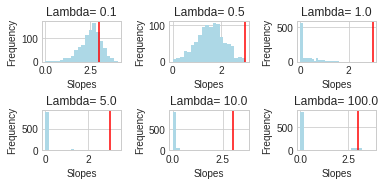

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=1.2, wspace=0.6)
for idx in range(len(lamdas)):
    plt.subplot(3, 3, idx+1)
    plt.hist(df[('lamda'+str(idx)+'_Xcoef')].values, bins=20, color="lightblue")
    plt.axvline(3, color="red")
    plt.xlabel("Slopes")
    plt.ylabel("Frequency")
    plt.title("Lambda= "+ str(lamdas[idx]))

Predicted Y vs True Value (label value)

Here, we want to predict X = 1.5, therefore, True value Y = 3.0 * 1.5 + 2 

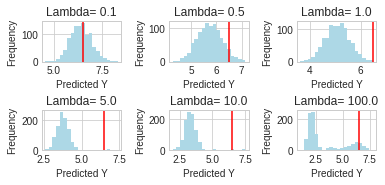

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=1.2, wspace=0.6)
for idx in range(len(lamdas)):
    plt.subplot(3, 3, idx+1)
    plt.hist(df[('lamda'+str(idx)+'_ypredic')].values, bins=20, color="lightblue")
    plt.axvline(2+3*1.5, color="red")
    plt.xlabel("Predicted Y")
    plt.ylabel("Frequency")
    plt.title("Lambda= "+ str(lamdas[idx]))

#### question 4(e)-2

#### Comment on the penalty caused by L1-Norm and L2-Norm
1. Based on the result of "Coefficient of X Term and True Value" plots, I find that in L2-norm, as Lambda is in the range 0 to 1, X term coefficents don't deviate from the true value too much, but distribution seems to be wider and wider as Lanbda increase. But, L1-norm is very sensitive as Lanbda increase.
2. Based on the result of "Predicted Y and True Value", I find that L2-norm is more stable as Lanbda increases (the regression still has ability to predict the true value). But, L1-norm strongly penalize all coefficients that extremely reduce model complexity as Lanbda increases.

# Question 5

#### Case Study

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer

# Saving TXT file to CSV file
import csv
import sys

txt_file = "./sales_data.txt"
csv_file = "./sales_data.csv"

with open(txt_file, "rt") as fin:
    lines = fin.readlines()
    data = [line.split() for line in lines]        
    
with open(csv_file, 'wt') as fout:
    out_csv = csv.writer(fout)
    out_csv.writerows(data)
    
# Saving CSV file to dataframe
df_house = pd.read_csv(csv_file, names=['ID', 'SalPrice', 'SquFeet', 'Bedrooms', 'Bathrooms', 'AC', 
                                        'GaraSize', 'Pool', 'Year', 'Quality', 'Style', 'LotSize', 'AdjaHW']) 
df_house.head()

,ID,SalPrice,SquFeet,Bedrooms,Bathrooms,AC,GaraSize,Pool,Year,Quality,Style,LotSize,AdjaHW
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0


In [0]:
X_house = df_house.drop(['ID', 'SalPrice'], axis=1)
y_house = df_house['SalPrice']

#### Using raw data as input to do OLS, Lasso and Ridge - Only use training data set

#### OLS with raw data- question 5(a)

In [0]:
paras_list = list()
es = 0
error = 0
es_percent= 0
error_per = 0
IterTimes = 1000
for Iter in range(IterTimes):
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, shuffle=True)
    X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, shuffle=True)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_train_iter)
    
    y_predict = np.array(ymodel)
    y_true_val = np.array(y_val_iter)
    y_true_train = np.array(y_train_iter)
    X_true_val = np.array(X_val_iter)
    X_true_train = np.array(X_train_iter)

    paras_list.append(model.coef_)  
    
    es = np.sqrt( sum((y_predict - y_true_train)**2) / len(y_predict) )
    es_percent = sum(np.abs(y_true_train - y_predict) / y_true_train) * 100 / len(y_true_train)
    error += es
    error_per += es_percent
    
params = pd.Series(np.sum(paras_list, axis=0) / IterTimes, index=X_train_iter.columns)

print("\nTotal Error: ", error / IterTimes)
print("Percentage Error: ", error_per / IterTimes, '%')
print(pd.DataFrame({'Coefficient': params.round(2)}))


Total Error:  62351.40137574111
Percentage Error:  17.385250541152452 %
           Coefficient
SquFeet         131.09
Bedrooms      -8824.53
Bathrooms      3063.08
AC           -14017.81
GaraSize      13913.11
Pool           9601.55
Year           1275.26
Quality      -48024.35
Style         -9505.06
LotSize           1.19
AdjaHW       -38687.06


### Ridge with raw data

In [0]:
paras_list = list()
es = 0
error = 0
es_percent= 0
error_per = 0
IterTimes = 1000
for Iter in range(IterTimes):
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, shuffle=True)
    X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, shuffle=True)

    model = Ridge(fit_intercept=True, alpha=1.5)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_train_iter)
    
    y_predict = np.array(ymodel)
    y_true_val = np.array(y_val_iter)
    y_true_train = np.array(y_train_iter)
    X_true_val = np.array(X_val_iter)
    X_true_train = np.array(X_train_iter)
    
    paras_list.append(model.coef_)
    
    es = np.sqrt( sum((y_predict - y_true_train)**2) / len(y_predict) )
    es_percent = sum(np.abs(y_true_train - y_predict) / y_true_train) * 100 / len(y_true_train)
    error += es
    error_per += es_percent
    
params = pd.Series(np.sum(paras_list, axis=0) / IterTimes, index=X_train_iter.columns)

print("\nTotal Error: ", error / IterTimes)
print("Percentage Error: ", error_per / IterTimes, '%')
print(pd.DataFrame({'Coefficient': params.round(2)}))


Total Error:  62281.34685344734
Percentage Error:  17.258894671902297 %
           Coefficient
SquFeet         130.97
Bedrooms      -8995.82
Bathrooms      3446.76
AC           -12210.66
GaraSize      13943.39
Pool           8955.81
Year           1272.11
Quality      -46299.52
Style         -9422.07
LotSize           1.21
AdjaHW       -31224.47


### Select Model with Ridge- question 5(e)

Text(0, 0.5, 'Absoluate Error')

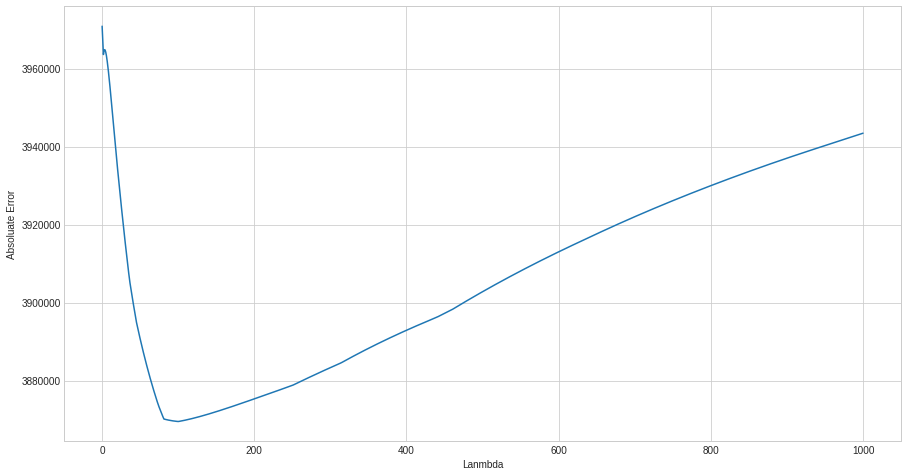

In [0]:
paras_list = list()
err_list = list()
lamda_list = list()
es = 0
lamdas = np.linspace(0, 1000, 10000)

X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, random_state=42)
X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, random_state=42)

y_true_val = np.array(y_val_iter)
y_true_train = np.array(y_train_iter)
X_true_val = np.array(X_val_iter)
X_true_train = np.array(X_train_iter)
y_true_test = np.array(y_test_iter)

for lamda in lamdas:
    
    model = Ridge(fit_intercept=True, alpha=lamda)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_val_iter)
    
    y_predict = np.array(ymodel)
    
    lamda_list.append(lamda)
    paras_list.append(model.coef_)
    err_list.append(sum(abs(y_predict - y_true_val)))
    
plt.figure(figsize=(15,8))
plt.plot(lamdas, err_list)
plt.xlabel("Lanmbda")
plt.ylabel("Absoluate Error")

In [0]:
minpos = err_list.index(min(err_list)) 
print("Min Lambda: ", lamda_list[minpos])
print("Coeff: ", paras_list[minpos])

Min Lambda:  100.1100110011001
Coeff:  [ 1.27997167e+02 -1.85570276e+03  5.40953644e+03 -8.16998741e+02
  1.14622264e+04  3.89826201e+03  1.45603494e+03 -1.32358675e+04
 -7.94392720e+03  1.76200304e+00 -1.50988216e+03]


### Lasso with raw data

In [0]:
paras_list = list()
es = 0
error = 0
es_percent= 0
error_per = 0
IterTimes = 1000

for Iter in range(IterTimes):
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, shuffle=True)
    X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, shuffle=True)

    model = Lasso(fit_intercept=True, alpha=1.5, max_iter=8000)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_train_iter)
    
    y_predict = np.array(ymodel)
    y_true_val = np.array(y_val_iter)
    y_true_train = np.array(y_train_iter)
    X_true_val = np.array(X_val_iter)
    X_true_train = np.array(X_train_iter)
    
    paras_list.append(model.coef_)
    es = np.sqrt( sum((y_predict - y_true_train)**2) / len(y_predict) )
    es_percent = sum(np.abs(y_true_train - y_predict) / y_true_train) * 100 / len(y_true_train)
    error += es
    error_per += es_percent
    
params = pd.Series(np.sum(paras_list, axis=0) / IterTimes, index=X_train_iter.columns)

print("\nTotal Error: ", error / IterTimes)
print("Percentage Error: ", error_per / IterTimes, '%')
print(pd.DataFrame({'Coefficient': params.round(2)}))


Total Error:  62263.47540407278
Percentage Error:  17.351599722597157 %
           Coefficient
SquFeet         130.34
Bedrooms      -8668.57
Bathrooms      3278.64
AC           -13848.15
GaraSize      14097.50
Pool           9313.36
Year           1257.34
Quality      -47979.28
Style         -9453.50
LotSize           1.18
AdjaHW       -37956.23


### Select Model with Lasso- question 5(f)

/home/james/miniconda3/envs/supervised-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/james/miniconda3/envs/supervised-py3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/james/miniconda3/envs/supervised-py3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0, 0.5, 'Absoluate Error')

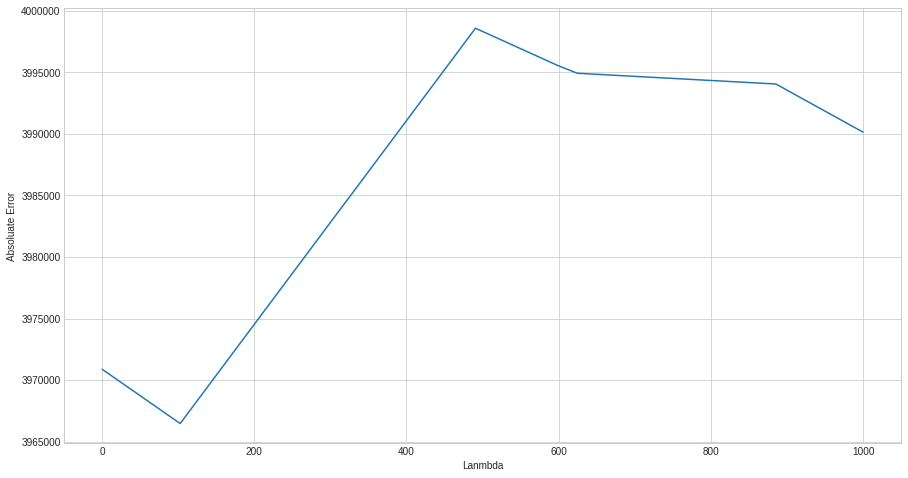

In [0]:
paras_list = list()
err_list = list()
lamda_list = list()
es = 0
lamdas = np.linspace(0, 1000, 10000)

X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, random_state=42)
X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, random_state=42)

y_true_val = np.array(y_val_iter)
y_true_train = np.array(y_train_iter)
X_true_val = np.array(X_val_iter)
X_true_train = np.array(X_train_iter)

for lamda in lamdas:
    
    model = Lasso(fit_intercept=True, alpha=lamda, max_iter=8000)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_val_iter)
    
    y_predict = np.array(ymodel)
    
    lamda_list.append(lamda)
    paras_list.append(model.coef_)
    err_list.append(sum(abs(y_predict - y_true_val)))
    
plt.figure(figsize=(15,8))
plt.plot(lamdas, err_list)
plt.xlabel("Lanmbda")
plt.ylabel("Absoluate Error")

In [0]:
minpos = err_list.index(min(err_list)) 
print("Min Lambda: ", lamda_list[minpos])
print("Coeff: ", paras_list[minpos])

Min Lambda:  102.6102610261026
Coeff:  [ 1.11990527e+02 -2.20782161e+03  5.88225417e+03 -1.09716380e+04
  2.34910567e+04  1.72748383e+04  1.07589845e+03 -3.66919241e+04
 -7.79408826e+03  1.59048152e+00 -2.30647111e+04]


#### Starting Processing Data to fix Error Rate

#### Feature and Target Correlation- question 5(b)

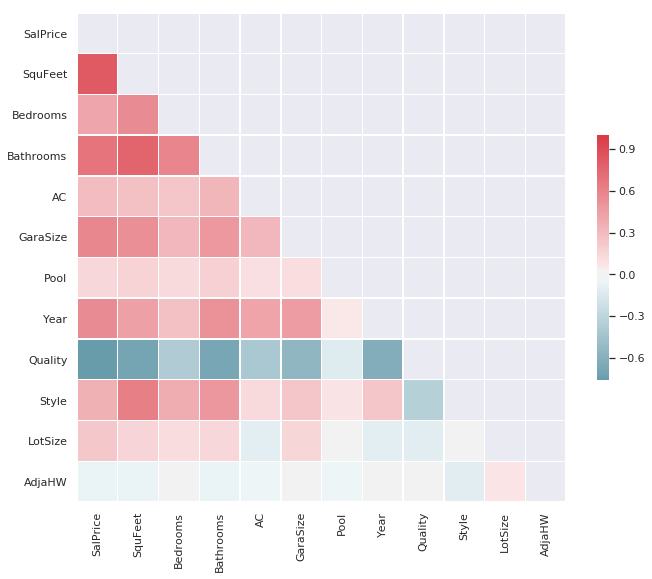

In [0]:
import seaborn as sns; sns.set()
corr = df_house.drop('ID', axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Outliers in numerical features

Text(0.5, 1.0, 'Lot Size')

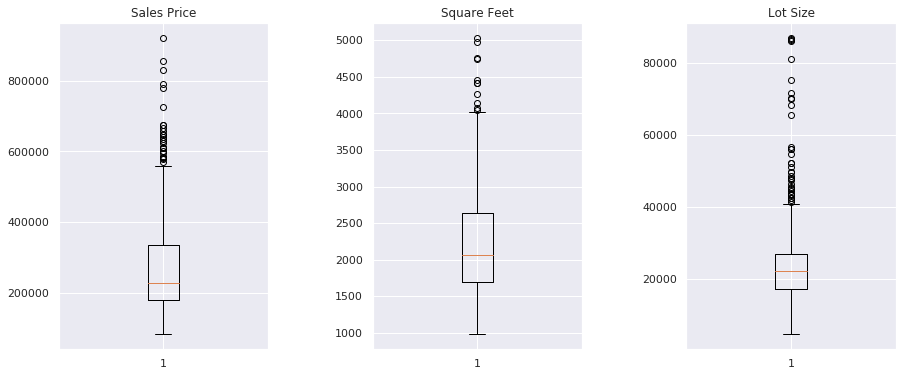

In [0]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(wspace=0.5)

plt.subplot(1, 3, 1)
plt.boxplot(df_house['SalPrice'])
plt.title("Sales Price")

plt.subplot(1, 3, 2)
plt.boxplot(df_house['SquFeet'])
plt.title("Square Feet")

plt.subplot(1, 3, 3)
plt.boxplot(df_house['LotSize'])
plt.title("Lot Size")

Bivariate distribution between Sales Price vs. Square Feet, and Sales Price vs. Lot Size

Text(0.5, 0, 'Lot Size')

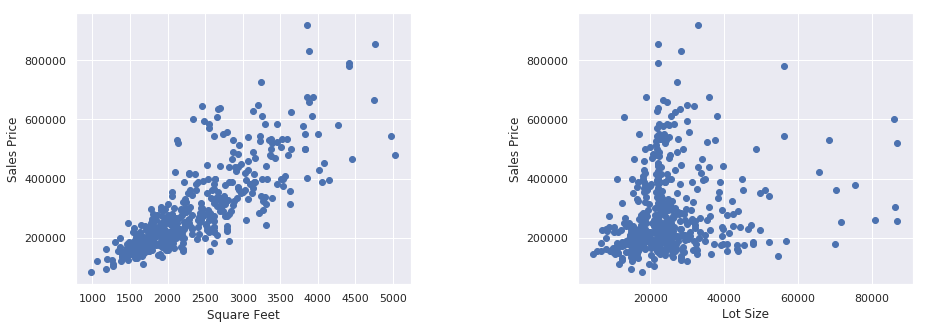

In [0]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
plt.scatter(df_house['SquFeet'], df_house['SalPrice'])
plt.ylabel("Sales Price")
plt.xlabel("Square Feet")

plt.subplot(1, 2, 2)
plt.scatter(df_house['LotSize'], df_house['SalPrice'])
plt.ylabel("Sales Price")
plt.xlabel("Lot Size")

#### Implication
1. Categorical predictors: except Sales Price, Square Feet and Lot Size
2. There is no missing data in this dataset, but "Sales Price", "Square Feet" and "Lot Size" have serveral outliers. Therefore, I removed them from the data.
3. According to heatmap, I find that all variables are some kind correlated to each other, except Sales Price vs Square Feet, which is highly correlated. Also, Quality seems to be negative correalted to other variables. If we want to express the Sales Price, features like Square Feet and Quality might be an important feature to predict price value.
4. Therefore, I will clean the dataset firest, and then transfer categorical features to binary feature, which will increase feature dimension.


Drop Outliers from dataset by IQR rule

In [0]:
max_boxplot_price = 1.5*(np.quantile(df_house.SalPrice, .75)-
                         np.quantile(df_house.SalPrice, .25)) + np.quantile(df_house.SalPrice, .75)
max_boxplot_squfeet = 1.5*(np.quantile(df_house.SquFeet, .75)-
                           np.quantile(df_house.SquFeet, .25)) + np.quantile(df_house.SquFeet, .75)
max_boxplot_lotsize = 1.5*(np.quantile(df_house.LotSize, .75)-
                           np.quantile(df_house.LotSize, .25)) + np.quantile(df_house.LotSize, .75)

outliers = df_house[df_house.SalPrice>max_boxplot_price]
outlier_idx = np.asarray(outliers.ID.values-1)

outliers = df_house[df_house.SquFeet>max_boxplot_squfeet]
outlier_idx2 = np.asarray(outliers.ID.values-1)

outliers = df_house[df_house.LotSize>max_boxplot_lotsize]
outlier_idx3 = np.asarray(outliers.ID.values-1)

outliers_all = np.concatenate((outlier_idx, outlier_idx2, outlier_idx3))

df_house_Drop = df_house.drop(outliers_all)
df_house_Drop = df_house_Drop.reset_index()

del df_house_Drop['index']
print(df_house_Drop.shape)

df_house_Drop.head()

(455, 13)


,ID,SalPrice,SquFeet,Bedrooms,Bathrooms,AC,GaraSize,Pool,Year,Quality,Style,LotSize,AdjaHW
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0


Bivariate distribution between Sales Price vs. Square Feet, and Sales Price vs. Lot Size

Text(0.5, 0, 'Lot Size')

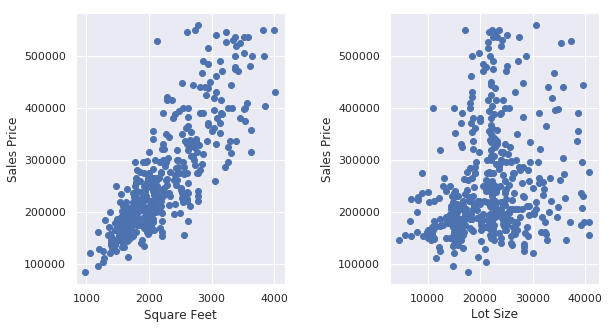

In [0]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

plt.subplot(1, 3, 1)
plt.scatter(df_house_Drop['SquFeet'], df_house_Drop['SalPrice'])
plt.ylabel("Sales Price")
plt.xlabel("Square Feet")

plt.subplot(1, 3, 2)
plt.scatter(df_house_Drop['LotSize'], df_house_Drop['SalPrice'])
plt.ylabel("Sales Price")
plt.xlabel("Lot Size")

One-Hot Encoder 

In [0]:
def house_categorized_feature(df, *argv):
    df_house_feature = df.drop([arg for arg in argv], axis=1)

    Bed = ['Bed_'+str(i) for i in df.Bedrooms.values]
    df_house_feature['Bedrooms'] = Bed
    
    Bath = ['Bath_'+str(i) for i in df.Bathrooms.values]
    df_house_feature['Bathrooms'] = Bath
    
    Gara = ['Gara_'+str(i) for i in df.GaraSize.values]
    df_house_feature['GaraSize'] = Gara
    
    Sty = ['Style_'+str(i) for i in df.Style.values]
    df_house_feature['Style'] = Sty
    
    AC = ['No' if i == 0 else 'YES' for i in df.AC.values]
    df_house_feature['AC'] = AC

    Pool = ['No' if i == 0 else 'YES' for i in df.Pool.values]
    df_house_feature['Pool'] = Pool

    Year = [str(i - i%10) + 's' for i in df.Year.values]
    df_house_feature['Year'] = Year

    Quality = list()
    for i in df.Quality.values:
        if i == 1:
            Quality.append('high')
        elif i == 2:
            Quality.append('medium')
        else:
            Quality.append('low')
    df_house_feature['Quality'] = Quality

    AdjaHW = ['No' if i == 0 else 'YES' for i in df.AdjaHW.values]
    df_house_feature['AdjaHW'] = AdjaHW

    df_house_feature.head()
    return df_house_feature

In [0]:
df_house_feature = house_categorized_feature(df_house_Drop, 'Bedrooms', 'Bathrooms', 
                                             'AC', 'GaraSize', 'Pool', 'Year', 'Quality', 'Style', 'AdjaHW', )
df_house_feature = df_house_feature.drop('ID', axis=1)

vec = DictVectorizer(sparse=False, dtype=int)
df_house_feature_oneHot = pd.DataFrame(vec.fit_transform(df_house_feature.to_dict('records')), 
                                       columns=vec.get_feature_names())

print("Data Shape: ", df_house_feature.shape)
df_house_feature.head()

Data Shape:  (455, 12)


,SalPrice,SquFeet,LotSize,Bedrooms,Bathrooms,GaraSize,Style,AC,Pool,Year,Quality,AdjaHW
0,360000,3032,22221,Bed_4,Bath_4,Gara_2,Style_1,YES,No,1970s,medium,No
1,340000,2058,22912,Bed_4,Bath_2,Gara_2,Style_1,YES,No,1970s,medium,No
2,250000,1780,21345,Bed_4,Bath_3,Gara_2,Style_1,YES,No,1980s,medium,No
3,205500,1638,17342,Bed_4,Bath_2,Gara_2,Style_1,YES,No,1960s,medium,No
4,275500,2196,21786,Bed_4,Bath_3,Gara_2,Style_7,YES,No,1960s,medium,No


In [0]:
df_house_feature_oneHot.head()

,AC=No,AC=YES,AdjaHW=No,AdjaHW=YES,Bathrooms=Bath_0,Bathrooms=Bath_1,Bathrooms=Bath_2,Bathrooms=Bath_3,Bathrooms=Bath_4,Bathrooms=Bath_5,...,Year=1900s,Year=1910s,Year=1920s,Year=1930s,Year=1940s,Year=1950s,Year=1960s,Year=1970s,Year=1980s,Year=1990s
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Starting training data after one-hot encode without outliers

In [0]:
X_house = df_house_feature_oneHot.drop('SalPrice', axis=1)
y_house = df_house_feature_oneHot['SalPrice']

X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)
print("Training set X: ", X_train.shape)

Training set X:  (291, 51)


### OLS model with processed data

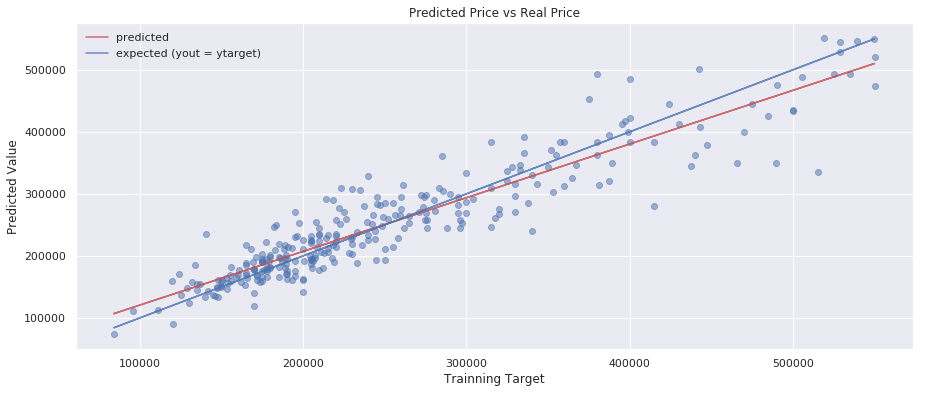

In [0]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
ymodel = model.predict(X_train)
err = (y_train - ymodel)

# Linear Regression for y_predict and y_true
model_2 = LinearRegression(fit_intercept=True)
model_2.fit(y_train[:,np.newaxis],ymodel)
predicted_y_train = model_2.predict(y_train[:,np.newaxis])

# Linear Regression for y_true and y_true
model_3 = LinearRegression(fit_intercept=True)
model_3.fit(y_train[:,np.newaxis],y_train)
y_train_real = model_3.predict(y_train[:,np.newaxis])

f, ax = plt.subplots(figsize=(15, 6))
plt.scatter(y_train, ymodel, alpha=0.5)
plt.plot(y_train, predicted_y_train, alpha=0.8, color='r', label='predicted')
plt.plot(y_train, y_train_real, alpha=0.8, color='b', label='expected (yout = ytarget)')
plt.xlabel("Trainning Target")
plt.ylabel("Predicted Value")
plt.title("Predicted Price vs Real Price")
plt.legend()

### Assumption of Normality- question 5(c)

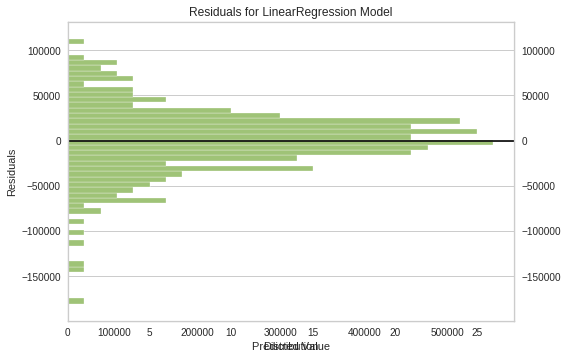

In [0]:
from yellowbrick.regressor import ResidualsPlot
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_train, y_train)  
visualizer.poof()                 

In [0]:
paras_list = list()
es = 0
error = 0
es_percent= 0
error_per = 0
IterTimes = 1000
for Iter in range(IterTimes):
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, shuffle=True)
    X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, shuffle=True)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_val_iter)
    
    y_predict = np.array(ymodel)
    y_true_val = np.array(y_val_iter)
    y_true_train = np.array(y_train_iter)
    X_true_val = np.array(X_val_iter)
    X_true_train = np.array(X_train_iter)

    paras_list.append(model.coef_)  
    
    es = np.sqrt( sum((y_predict - y_true_val)**2) / len(y_predict) )
    es_percent = sum(np.abs(y_true_val - y_predict) / y_true_val) * 100 / len(y_true_val)
    error += es
    error_per += es_percent
    
params = pd.Series(np.sum(paras_list, axis=0) / IterTimes, index=X_train_iter.columns)

print("\nTotal Error: ", error / IterTimes)
print("Percentage Error: ", error_per / IterTimes, '%')

### Ridge model with processed data

#### Select Model with Ridge- question 5(e)

Text(0, 0.5, 'Absoluate Error')

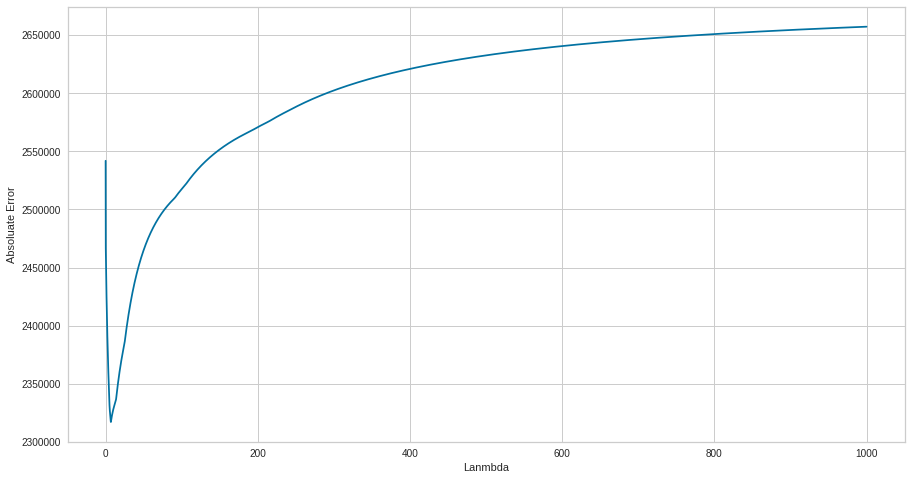

In [0]:
paras_list = list()
err_list = list()
lamda_list = list()
es = 0
lamdas = np.linspace(0, 1000, 10000)

X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, random_state=42)
X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, random_state=42)

y_true_val = np.array(y_val_iter)
y_true_train = np.array(y_train_iter)
X_true_val = np.array(X_val_iter)
X_true_train = np.array(X_train_iter)
y_true_test = np.array(y_test_iter)

for lamda in lamdas:
    
    model = Ridge(fit_intercept=True, alpha=lamda)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_val_iter)
    
    y_predict = np.array(ymodel)
    
    lamda_list.append(lamda)
    paras_list.append(model.coef_)
    err_list.append(sum(abs(y_predict - y_true_val)))
    
plt.figure(figsize=(15,8))
plt.plot(lamdas, err_list)
plt.xlabel("Lanmbda")
plt.ylabel("Absoluate Error")

In [0]:
minpos = err_list.index(min(err_list)) 
print("Min Lambda: ", lamda_list[minpos])
print("Coeff: ", paras_list[minpos])

Min Lambda:  6.900690069006901
Coeff:  [-3.79359319e+03  3.79359319e+03  5.56105956e+03 -5.56105956e+03
  0.00000000e+00 -1.94072504e+04 -2.10961180e+04 -1.56673708e+03
  2.00765706e+04  2.29760317e+04 -9.82496888e+02  0.00000000e+00
 -9.09275865e+03 -4.30048373e+03 -2.19028770e+02  2.13136167e+03
  1.83509028e+04 -6.86999335e+03 -3.35696944e+03 -5.59671501e+03
 -5.05375367e+03  1.73510434e+04 -3.34360525e+03  1.16674384e+00
 -1.31363784e+04  1.31363784e+04  3.34181910e+04 -1.85574042e+04
 -1.48607868e+04  1.09133772e+02  1.75037987e+04 -1.97932672e+03
  0.00000000e+00  1.96585925e+03 -2.42707700e+03  1.22473241e+04
 -1.73802087e+03 -5.61968003e+03 -2.43238572e+04  4.37097971e+03
 -1.39219935e+04  0.00000000e+00  1.33279834e+03  1.60598224e+03
 -4.57010791e+03 -1.70903275e+04 -1.07833839e+04 -9.74872417e+03
 -6.30122373e+03  7.43847539e+03  5.20385048e+04]


In [0]:
paras_list = list()
es = 0
error = 0
es_percent= 0
error_per = 0
IterTimes = 1000
for Iter in range(IterTimes):
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, shuffle=True)
    X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, shuffle=True)

    model = Ridge(fit_intercept=True, alpha=7)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_val_iter)
    
    y_predict = np.array(ymodel)
    y_true_val = np.array(y_val_iter)
    y_true_train = np.array(y_train_iter)
    X_true_val = np.array(X_val_iter)
    X_true_train = np.array(X_train_iter)
    
    paras_list.append(model.coef_)
    
    es = np.sqrt( sum((y_predict - y_true_val)**2) / len(y_predict) )
    es_percent = sum(np.abs(y_true_val - y_predict) / y_true_val) * 100 / len(y_true_val)
    error += es
    error_per += es_percent
    
params = pd.Series(np.sum(paras_list, axis=0) / IterTimes, index=X_train_iter.columns)

print("\nTotal Error: ", error / IterTimes)
print("Percentage Error: ", error_per / IterTimes, '%')


Total Error:  44207.038327022805
Percentage Error:  12.923283653884898 %


### Lasso model with processed data

#### Select Model with Lasso- question 5(f)

/home/james/miniconda3/envs/supervised-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/james/miniconda3/envs/supervised-py3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/james/miniconda3/envs/supervised-py3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/james/miniconda3/envs/supervised-py3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting dat

Text(0, 0.5, 'Absoluate Error')

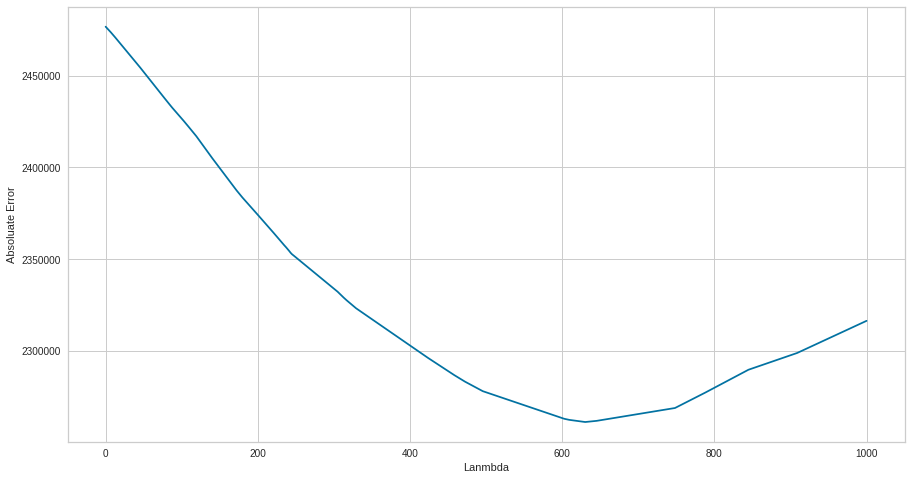

In [0]:
paras_list = list()
err_list = list()
lamda_list = list()
es = 0
lamdas = np.linspace(0, 1000, 10000)

X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, random_state=42)
X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, random_state=42)

y_true_val = np.array(y_val_iter)
y_true_train = np.array(y_train_iter)
X_true_val = np.array(X_val_iter)
X_true_train = np.array(X_train_iter)
y_true_test = np.array(y_test_iter)

for lamda in lamdas:
    
    model = Lasso(fit_intercept=True, alpha=lamda, max_iter=10000)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_val_iter)
    
    y_predict = np.array(ymodel)
    
    lamda_list.append(lamda)
    paras_list.append(model.coef_)
    err_list.append(sum(abs(y_predict - y_true_val)))
    
plt.figure(figsize=(15,8))
plt.plot(lamdas, err_list)
plt.xlabel("Lanmbda")
plt.ylabel("Absoluate Error")

In [0]:
minpos = err_list.index(min(err_list)) 
print("Min Lambda: ", lamda_list[minpos])
print("Coeff: ", paras_list[minpos])

Min Lambda:  630.06300630063
Coeff:  [-3.04393355e+03  1.34282776e-12  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.80665222e+04 -1.92895221e+04  0.00000000e+00
  1.87982221e+04  1.67112409e+04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.13241316e+03 -0.00000000e+00  0.00000000e+00
  1.54213729e+04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.86142839e+04 -0.00000000e+00  1.07402636e+00
 -2.36685881e+04  1.34650071e-10  4.86307845e+04 -4.96299088e+03
  0.00000000e+00  1.12277611e+02  1.20413361e+04 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.37652086e+04  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -6.30899703e+03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.17866113e+04  7.56611613e+04]


In [0]:
paras_list = list()
es = 0
error = 0
es_percent= 0
error_per = 0
IterTimes = 1000
for Iter in range(IterTimes):
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X_house, y_house, test_size=0.2, shuffle=True)
    X_train_iter, X_val_iter, y_train_iter, y_val_iter = train_test_split(X_train_iter, y_train_iter, test_size=0.2, shuffle=True)

    model = Lasso(fit_intercept=True, alpha=630, max_iter=2000)
    model.fit(X_train_iter,y_train_iter)
    ymodel = model.predict(X_val_iter)
    
    y_predict = np.array(ymodel)
    y_true_val = np.array(y_val_iter)
    y_true_train = np.array(y_train_iter)
    X_true_val = np.array(X_val_iter)
    X_true_train = np.array(X_train_iter)
    
    paras_list.append(model.coef_)
    
    es = np.sqrt( sum((y_predict - y_true_val)**2) / len(y_predict) )
    es_percent = sum(np.abs(y_true_val - y_predict) / y_true_val) * 100 / len(y_true_val)
    error += es
    error_per += es_percent
    
params = pd.Series(np.sum(paras_list, axis=0) / IterTimes, index=X_train_iter.columns)

print("\nTotal Error: ", error / IterTimes)
print("Percentage Error: ", error_per / IterTimes, '%')


Total Error:  43921.56809307317
Percentage Error:  12.899891135248113 %


## Conclusion- question 5(g)(h)

1. There are two pattern shown on above:
    a. The raw dataset as the input (treat the entire data, in TXT file, as numeric data)
    
    => I obtain (1) Normal Linear Regression: ~17% error rate using only training set
                (2) Ridge Linear Regression: ~17% error rate (not with best Lambda) using only training set
                (3) Lasso Linear Regression: ~17% error rate (not with best Lambda) using only training set
                
    b. Dropping out outliers in "Sale Price", "Square Feet" and "Lot Size" + one-hot encoder for other data
    
    => I obtain (1) Normal Linear Regression: incredible big error rate 
                (2) Ridge Linear Regression: ~13% error rate (with best Lambda) testing in validation set
                (3) Lasso Linear Regression: ~13% error rate (with best Lambda) testing in validation set
                
2. I prefer to use Ridge Linear Regression to do this task, because I obtain similar accuracy both in Ridge and Lasso. Also, with the model selection, Lasso gives me up to 600 value for Lambda. Speaking of Normal Linear Regression, I think that it might be overfitting in some way (but the training error is not close ot 0). I'm still not sure why it can't be converged.


3. Actually, I also try scaling and transforming to adjust the data, but I also obtain a worse predicted value compared with (b) pattern I mentioned.